# 프로젝트 개요
- 강의명 : (산대특)_공공데이터 활용 빅데이터 분석 및 시각화 전문가 과정 육성
- 교과목명 : 머신러닝 기초
- 프로젝트 주제 : wine 데이터를 활용한 분류 모형 만들기
- 프로젝트 마감일 : 2022년 10월 21일 금요일
- 수강생명 : 임여명

## 평가 1. 데이터 수집 (10점)
- 와인 데이터셋을 판다스 데이터 프레임으로 불러들인다. 
- Describe 함수를 사용하여 각 변수의 평균과 표준편차를 구한다. 
  + alcohol (평균/표준편차)
  + sugar (평균/표준편차)
  + pH (평균/표준편차)

In [377]:
# 와인 데이터 셋 판다스 데이터 프레임으로 호출
import pandas as pd
import numpy as np

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [378]:
wine.describe()
#alcohol 평균 : 10.491801 표준편차 : 1.192712
#sugar   평균 :  5.443235 표준편차 : 4.757804
#pH      평균 :  3.218501 표준편차 : 0.160787  


,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


## 평가 2. 데이터 시각화 (20점)
- 종속변수를 기준으로 각 변수의 박스플롯을 작성한다. 
- 각 변수별 조합을 통해 산점도를 작성한다. 
- 점수
  + 시각화 5개 20점 
  + 시각화 3개 10점 
  + 시각화 1개 5점

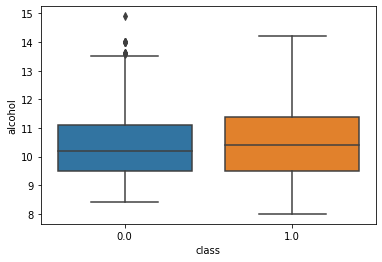

In [391]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=wine, x='class', y='alcohol')

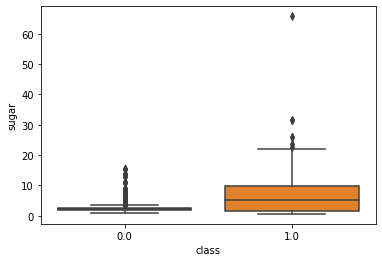

In [380]:
sns.boxplot(data=wine, x='class', y='sugar')

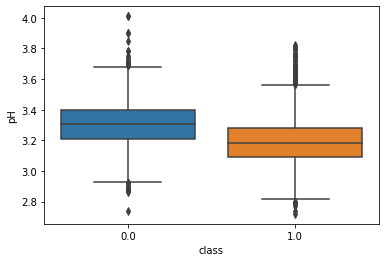

In [381]:
sns.boxplot(data=wine, x='class', y='pH')

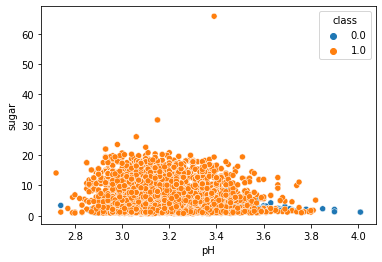

In [382]:
sns.scatterplot(data = wine, x = 'pH', y= 'sugar', hue='class')

## 평가 3. 피처 공학 및 데이터 분리 (20점)
- 교차검증을 위한 데이터세트를 준비한다. 
- 데이터 표준화를 진행한다. 

In [383]:
from sklearn.model_selection import train_test_split 

#데이터 세트 분리
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42
)

train_input.shape, test_input.shape, train_target.shape, test_target.shape

((5197, 3), (1300, 3), (5197,), (1300,))

In [384]:
from pandas.core.common import random_state
sub_input, val_input, sub_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

sub_input.shape, val_input.shape, sub_target.shape, val_target.shape

((4157, 3), (1040, 3), (4157,), (1040,))

In [385]:
#데이터 표준화
from sklearn.preprocessing import StandardScaler 

ss = StandardScaler()
ss.fit(train_input) 

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)


## 평가 4. 머신러닝 모델링 (40점)
- 분류 모형을 만들기 위해 다양한 알고리즘을 적용할 수 있다. 
- 분류 모형을 만들기 위해 하이퍼파라미터를 적용할 수 있다.
- 채점기준
  + 모델 3개 개발 + 각 모델 하이퍼 적용 : 40점
  + 모델 2개 개발 + 각 모델 하이퍼 적용 : 30점
  + 모델 1개 개발 + 각 모델 하이퍼 적용 : 20점
  + 모델 N개 개발 + 하이퍼파라미터 미 적용 시 20점

In [386]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
params = {'max_depth' : [2,3,4,5,6,7]}
gs=GridSearchCV(dt, params, n_jobs=1)
gs.fit(train_scaled, train_target)

print(gs.best_params_)
best_dt = gs.best_estimator_

{'max_depth': 5}


In [399]:
from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression(C=20, max_iter = 1000,random_state=42)
lr = LogisticRegression(random_state=42)
params = {'penalty':['l2', 'l1'],
         'C':[0.01, 0.1, 1, 5, 10]}
gs2 = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=3)
gs2.fit(train_scaled, train_target)
print(gs2.best_params_)
best_lr= gs2.best_estimator_                                               
# lr.fit(train_scaled, train_target)

LogisticRegression(C=20, max_iter=1000, random_state=42)

In [388]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=1, random_state=42)
scores = cross_validate(rf, train_scaled, train_target, return_train_score=True)

## 평가 5. 머신러닝 평가 (10점)
- 훈련데이터 및 테스트 데이터의 정확도를 산출한다. 
- 정확도 산출 10점 / 미 산출 (0점)

In [401]:
print('의사결정나무모델 정확도')
print(best_dt.score(train_scaled, train_target))
print(best_dt.score(test_scaled, test_target))
print('-'*80)
print('로지스틱회귀모델 정확도')
# print(lr.score(train_scaled, train_target))
# print(lr.score(test_scaled, test_target))
print(best_lr.score(train_scaled, train_target))
print(best_lr.score(test_scaled, test_target))
print('-'*80)
print('랜덤포레스트모델 정확도')
print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

의사결정나무모델 정확도
0.8672310948624207
0.8607692307692307
--------------------------------------------------------------------------------
로지스틱회귀모델 정확도
0.7808350971714451
0.7776923076923077
--------------------------------------------------------------------------------
랜덤포레스트모델 정확도
0.9973541965122431
0.8918629229288518
